In [67]:
import pandas as pd
import numpy as np
c=pd.read_csv('covidcases.csv')
c

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [68]:
c.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

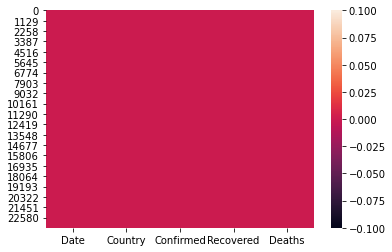

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(c.isnull())
plt.show()

In [70]:
c.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [71]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [72]:
c.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [73]:
c_df=c[['year','month','day']]=c['Date'].str.split('-',expand=True)

In [74]:
c_df

,0,1,2
0,2020,01,22
1,2020,01,22
2,2020,01,22
3,2020,01,22
4,2020,01,22
...,...,...,...
23683,2020,05,26
23684,2020,05,26
23685,2020,05,26
23686,2020,05,26


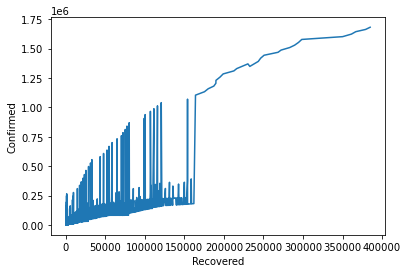

In [75]:
sns.lineplot(x='Recovered',y='Confirmed',data=cc)
plt.show()

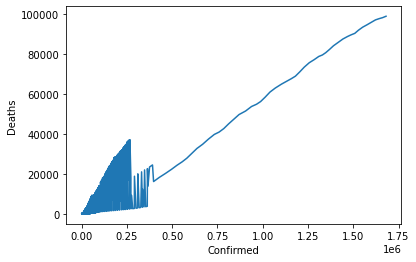

In [76]:
sns.lineplot(x='Confirmed',y='Deaths',data=c)
plt.show()

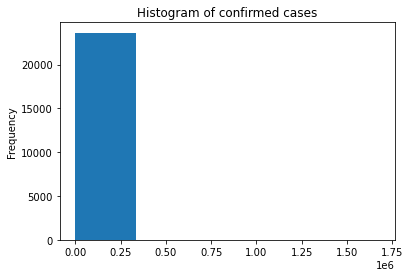

In [77]:
c['Confirmed'].plot.hist(bins=5)
plt.title('Histogram of confirmed cases')
plt.show()

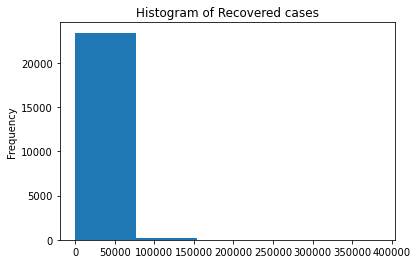

In [78]:
c['Recovered'].plot.hist(bins=5)
plt.title('Histogram of Recovered cases')
plt.show()

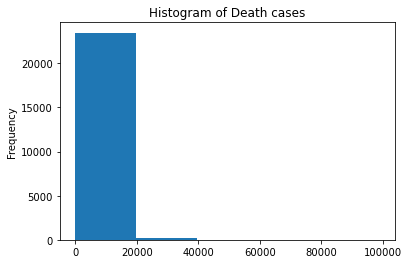

In [79]:
c['Deaths'].plot.hist(bins=5)
plt.title('Histogram of Death cases')
plt.show()

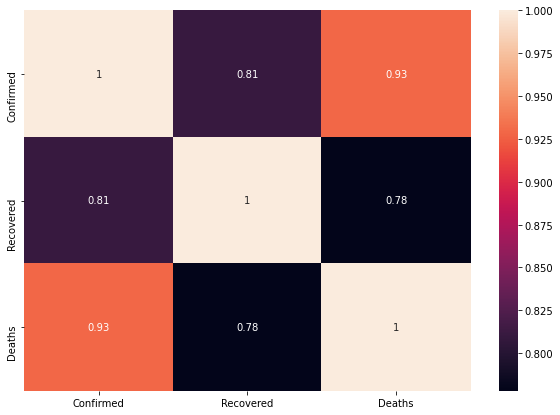

In [80]:
plt.figure(figsize=(10,7))
sns.heatmap(c.corr(),annot=True)

In [81]:
c['year'].unique()


array(['2020'], dtype=object)

In [82]:
c1=c.drop(['Date','Country','day','month','year'],axis=1)


In [83]:
c1

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


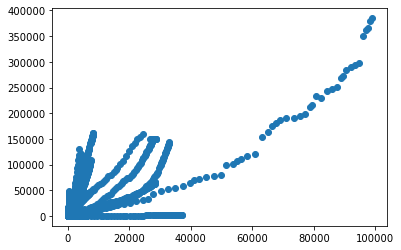

In [84]:
plt.scatter(c['Deaths'],c['Recovered'])
plt.show()

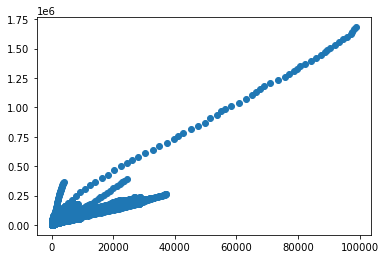

In [85]:
plt.scatter(c['Deaths'],c['Confirmed'])
plt.show()

In [86]:
c1.shape

(23688, 3)

In [87]:
c1.head()

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [88]:
c1.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [89]:
for col in c1.columns:
    if c1[col].skew()>0.55:
        c1[col]=np.log1p(c1[col])

In [90]:
c1.skew()

Confirmed    0.538470
Recovered    1.011590
Deaths       1.598833
dtype: float64

In [91]:
collist=c1.columns.values
ncol=9
nrow=9

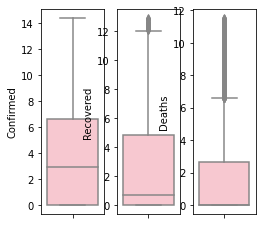

In [92]:
plt.figure(figsize=(12,40))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(c1[collist[i]],color='pink',orient='v')

In [93]:
from scipy.stats import zscore
z=np.abs(zscore(c1))
z

array([[1.02851613, 0.8092577 , 0.67086286],
       [1.02851613, 0.8092577 , 0.67086286],
       [1.02851613, 0.8092577 , 0.67086286],
       ...,
       [0.50534411, 0.05256909, 0.96586491],
       [0.86759469, 1.02734898, 0.19914217],
       [0.09464234, 0.21887918, 0.00250018]])

In [94]:
threshold=3
print(np.where(z>3))

(array([11741, 11929, 12117, 12305, 12493, 12681, 12754, 12869, 12942,
       13057, 13130, 13245, 13318, 13334, 13433, 13506, 13522, 13598,
       13621, 13694, 13710, 13786, 13809, 13882, 13898, 13974, 13997,
       14070, 14086, 14162, 14185, 14258, 14274, 14350, 14373, 14446,
       14462, 14466, 14538, 14561, 14634, 14650, 14654, 14726, 14749,
       14822, 14838, 14842, 14914, 14937, 15010, 15026, 15030, 15102,
       15125, 15198, 15214, 15218, 15290, 15313, 15386, 15402, 15406,
       15478, 15501, 15574, 15590, 15594, 15666, 15689, 15762, 15778,
       15782, 15854, 15877, 15950, 15966, 15970, 16042, 16065, 16138,
       16154, 16158, 16230, 16253, 16326, 16342, 16346, 16418, 16441,
       16514, 16530, 16534, 16606, 16629, 16702, 16718, 16722, 16794,
       16817, 16890, 16906, 16910, 16982, 17005, 17078, 17094, 17098,
       17170, 17193, 17266, 17282, 17286, 17312, 17358, 17381, 17454,
       17470, 17474, 17500, 17546, 17569, 17642, 17658, 17662, 17688,
       17734, 17757

In [95]:
cc_new=c1[(z<3).all(axis=1)]

In [96]:
print(c1.shape,'\t',cc_new.shape)

(23688, 3) 	 (23288, 3)


In [97]:
covid=cc_new
print(covid.shape)

(23288, 3)


In [98]:
covid_x=covid.drop(columns=['Deaths'])

In [99]:
y=pd.DataFrame(covid['Deaths'])

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(covid_x)
x=pd.DataFrame(x,columns=covid_x.columns)

In [101]:
x.skew()

Confirmed    0.489203
Recovered    0.984873
dtype: float64

In [102]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
max_r_score=0
for r_state in range(30,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r_scr=r2_score(y_test,y_pred)
    if r_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)


max r2 score corresponding to 1998 is 0.8223573969569762


In [103]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([-0.83104219,  0.41245473,  0.70626768,  0.72997895,  0.70191693])

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=170,test_size=0.40)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is:',r2_score(y_test,y_pred))

RMSE is: 0.9170115450309847
r2_score is: 0.8219588880573935
